<a href="https://colab.research.google.com/github/TRxcha/Challenge_AluraStore/blob/main/AluraStoreBr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importação dos dados



In [52]:
# Importação de bibliotecas para o uso futuro
import pandas as pd # Para manipular os dados do .csv fornecido
import numpy as np # Manipulação de contas e números
import matplotlib.pyplot as plt # Manipulação de gráficos
from matplotlib.ticker import MultipleLocator # Parâmetro específico da biblioteca para delimitar os pontos do gráfico de barras

# Importando o .csv e o salvando em variáveis
url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja1 = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja1.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento


In [53]:
#Análise do faturamento de cada loja

# Função para formatar valores
def format_vl (vl):
    return f"R${vl:,.2f}"

# Faturamento de cada loja
fat_loja1 = loja1['Preço'].sum()
fat_loja2 = loja2['Preço'].sum()
fat_loja3 = loja3['Preço'].sum()
fat_loja4 = loja4['Preço'].sum()
fat_list = [fat_loja1, fat_loja2, fat_loja3, fat_loja4]

# Faturamento formatado para mostrar ao usuário
fat_loja1f = format_vl(fat_loja1)
fat_loja2f = format_vl(fat_loja2)
fat_loja3f = format_vl(fat_loja3)
fat_loja4f = format_vl(fat_loja4)
fat_listf = [fat_loja1f, fat_loja2f, fat_loja3f, fat_loja4f]

# Mostrar ao usuário o faturamento formatado
for i, fat in enumerate(fat_listf, start=1):
    print(f"O faturamento da loja {i} foi R${fat}")

O faturamento da loja 1 foi R$R$1,534,509.12
O faturamento da loja 2 foi R$R$1,488,459.06
O faturamento da loja 3 foi R$R$1,464,025.03
O faturamento da loja 4 foi R$R$1,384,497.58


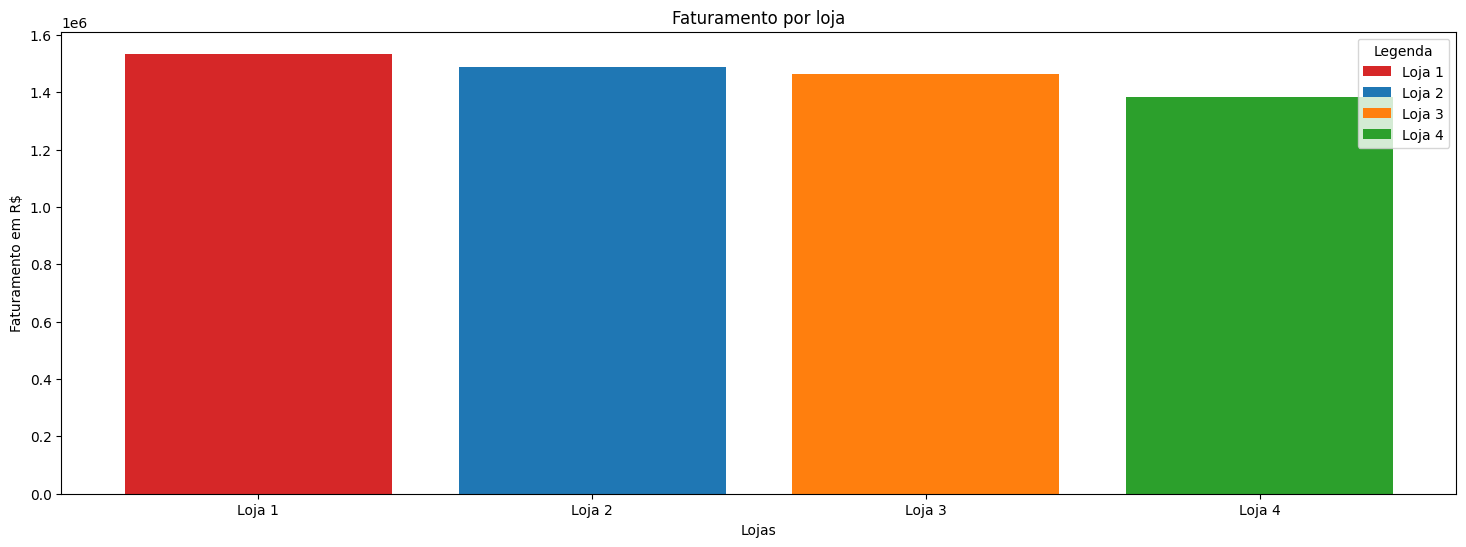

In [54]:
#Gráfico da relação do faturamento de cada loja
lojas = ["Loja 1", "Loja 2", "Loja 3", "Loja 4"]

fig, ax = plt.subplots(figsize=(18, 6))

lojas = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']
bar_labels = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']
bar_colors = ['tab:red', 'tab:blue', 'tab:orange', 'tab:green']

ax.bar(lojas, fat_list, label=bar_labels, color=bar_colors)

ax.set_ylabel('Faturamento em R$')
ax.set_xlabel('Lojas')
ax.set_title('Faturamento por loja')
ax.legend(title='Legenda')

plt.show()

# 2. Vendas por Categoria


In [55]:
#Vendas por categoria em cada loja
# Dicionario de cada loja com quantos itens foram vendidos por categoria

l1_cat_dict = {categoria: count for categoria, count in loja1['Categoria do Produto'].value_counts().items()}
l2_cat_dict = {categoria: count for categoria, count in loja2['Categoria do Produto'].value_counts().items()}
l3_cat_dict = {categoria: count for categoria, count in loja3['Categoria do Produto'].value_counts().items()}
l4_cat_dict = {categoria: count for categoria, count in loja4['Categoria do Produto'].value_counts().items()}

# Qual foi a categoria mais vendida de cada loja e quantos itens foram vendidos nela
l1_most_cat = max(l1_cat_dict, key=l1_cat_dict.get)
l2_most_cat = max(l2_cat_dict, key=l2_cat_dict.get)
l3_most_cat = max(l3_cat_dict, key=l3_cat_dict.get)
l4_most_cat = max(l4_cat_dict, key=l4_cat_dict.get)

l1_minus_cat = min(l1_cat_dict, key=l1_cat_dict.get)
l2_minus_cat = min(l2_cat_dict, key=l2_cat_dict.get)
l3_minus_cat = min(l3_cat_dict, key=l3_cat_dict.get)
l4_minus_cat = min(l4_cat_dict, key=l4_cat_dict.get)

# Comparação de qual loja vendeu mais na categoria x
relacao = list(zip(l1_cat_dict.keys(), l1_cat_dict.values(), l2_cat_dict.values(), l3_cat_dict.values(), l4_cat_dict.values()))
for i in relacao:
  cat = i[0]
  values = i[1:]
  maior_valor = max(values)
  indice_maior = int(values.index(maior_valor)) + 1
  indices_maiores = [idx + 1 for idx, val in enumerate(values) if val == maior_valor]
  if len(indices_maiores) == 1:
      print(f'Na categoria {cat}, a loja que mais vendeu foi a Loja {indices_maiores[0]} com {maior_valor} unidades.\n')
  else:
      lojas_empate = ', '.join([f'Loja {i}' for i in indices_maiores])
      print(f'Na categoria {cat}, houve um empate entre as lojas {lojas_empate}, cada uma com {maior_valor} unidades.\n')

Na categoria moveis, a loja que mais vendeu foi a Loja 3 com 499 unidades.

Na categoria eletronicos, houve um empate entre as lojas Loja 3, Loja 4, cada uma com 451 unidades.

Na categoria brinquedos, a loja que mais vendeu foi a Loja 4 com 338 unidades.

Na categoria eletrodomesticos, a loja que mais vendeu foi a Loja 1 com 312 unidades.

Na categoria esporte e lazer, a loja que mais vendeu foi a Loja 1 com 284 unidades.

Na categoria instrumentos musicais, a loja que mais vendeu foi a Loja 2 com 224 unidades.

Na categoria livros, a loja que mais vendeu foi a Loja 2 com 197 unidades.

Na categoria utilidades domesticas, a loja que mais vendeu foi a Loja 2 com 181 unidades.



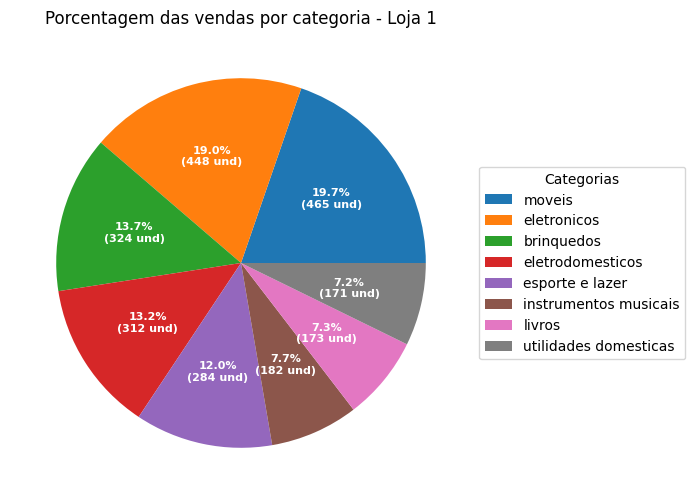

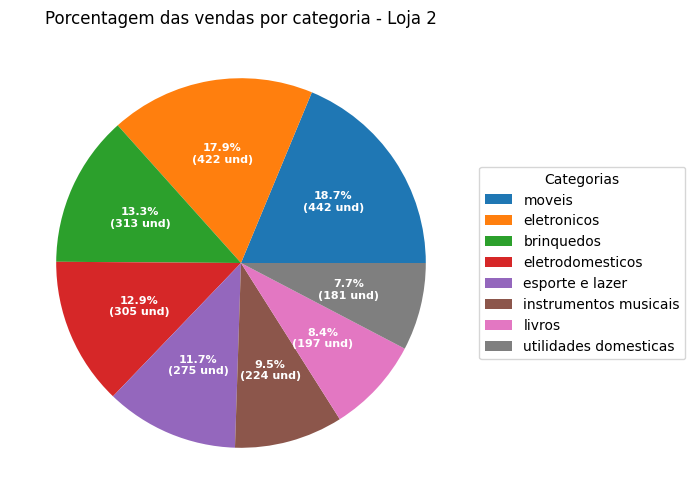

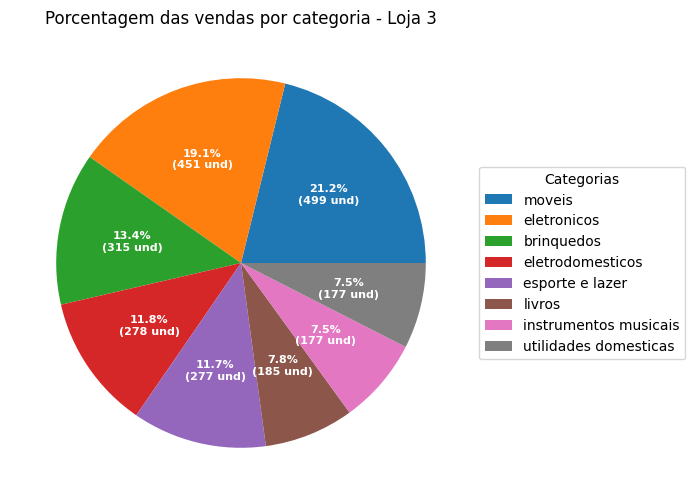

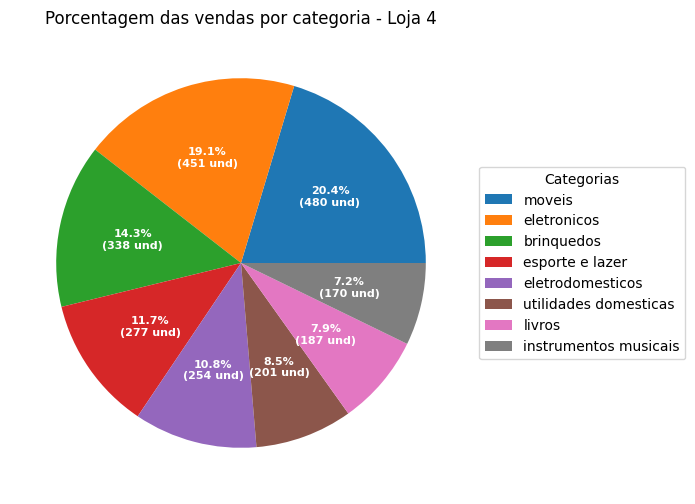

In [56]:
# Função que cria gráficos de pizza indicando a porcentagem de cada categoria sob o valor total

def pie_grafic(data, categories, nmr_loja):
    fig, ax = plt.subplots(figsize=(18, 6), subplot_kw=dict(aspect="equal"))

    def func(pct, allvals):
        absolute = int(np.round(pct / 100. * np.sum(allvals)))
        return f"{pct:.1f}%\n({absolute:d} und)"

    wedges, texts, autotexts = ax.pie(data, autopct=lambda pct: func(pct, data),
                                      textprops=dict(color="w"))

    ax.legend(wedges, categories,
              title="Categorias",
              loc="center left",
              bbox_to_anchor=(1, 0, 0.5, 1))

    plt.setp(autotexts, size=8, weight="bold")
    ax.set_title(f"Porcentagem das vendas por categoria - Loja {nmr_loja}")

    plt.show()

data_l1 = list(l1_cat_dict.values())
cat_l1 = list(l1_cat_dict.keys())
data_l2 = list(l2_cat_dict.values())
cat_l2 = list(l2_cat_dict.keys())
data_l3 = list(l3_cat_dict.values())
cat_l3 = list(l3_cat_dict.keys())
data_l4 = list(l4_cat_dict.values())
cat_l4 = list(l4_cat_dict.keys())

lojas_dados = [l1_cat_dict, l2_cat_dict, l3_cat_dict, l4_cat_dict]

for i, loja_dict in enumerate(lojas_dados, 1):
    data = list(loja_dict.values())
    categories = list(loja_dict.keys())
    pie_grafic(data, categories, i)

# 3. Média de Avaliação das Lojas

A média de avaliação da loja 1 é 3.98

A média de avaliação da loja 2 é 4.04

A média de avaliação da loja 3 é 4.05

A média de avaliação da loja 4 é 4.00



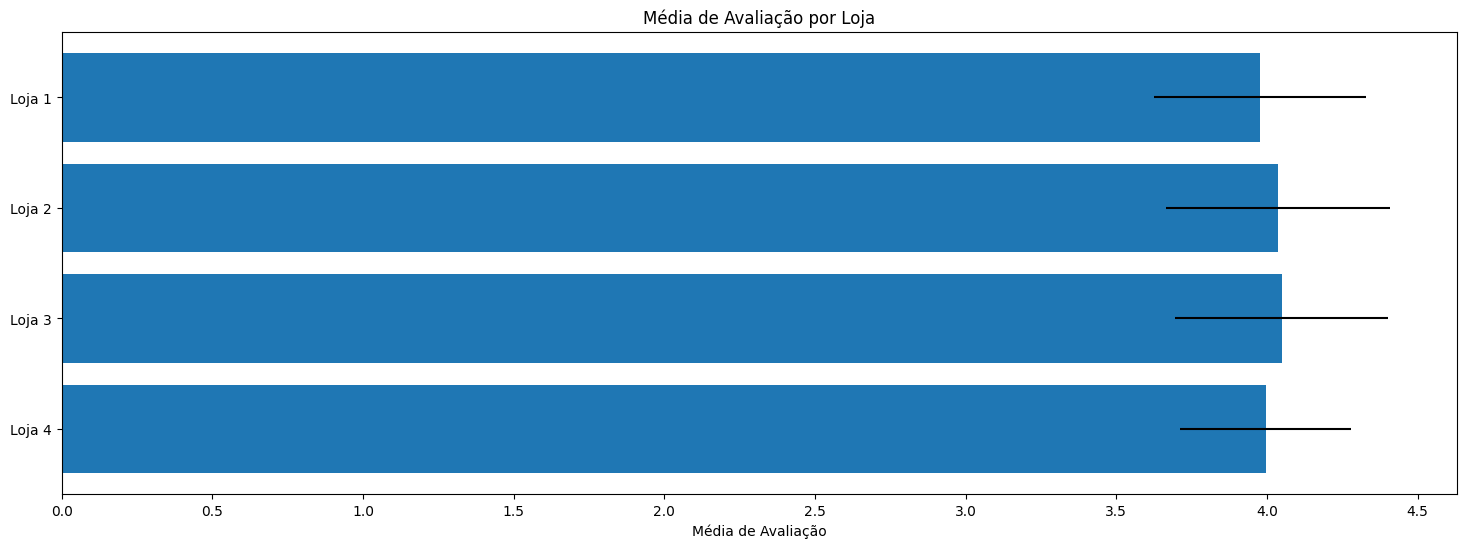

In [57]:
#Média de avaliação de cada loja

# Função que retorna a média de avaliação de cada loja
def media_avl (lista):
  qtditens = len(lista)
  total_vl = sum(lista)
  media = total_vl / qtditens
  return media

# Lista de avaliações para cada loja
l1_av_list = [avl for avl in loja1['Avaliação da compra']]
l2_av_list = [avl for avl in loja2['Avaliação da compra']]
l3_av_list = [avl for avl in loja3['Avaliação da compra']]
l4_av_list = [avl for avl in loja4['Avaliação da compra']]

l1_media_avl = media_avl(l1_av_list)
l2_media_avl = media_avl(l2_av_list)
l3_media_avl = media_avl(l3_av_list)
l4_media_avl = media_avl(l4_av_list)

# Prints para o usuário
print(f'A média de avaliação da loja 1 é {l1_media_avl:.2f}\n')
print(f'A média de avaliação da loja 2 é {l2_media_avl:.2f}\n')
print(f'A média de avaliação da loja 3 é {l3_media_avl:.2f}\n')
print(f'A média de avaliação da loja 4 é {l4_media_avl:.2f}\n')

# Criação de listas e parâmetros para gerar o gráfico
media_lojas = [l1_media_avl, l2_media_avl, l3_media_avl, l4_media_avl]
list_lojas = ['Loja 1', 'Loja 2', 'Loja 3', 'Loja 4']
y_pos = np.arange(len(media_lojas))
np.random.seed(19680801)
error = np.random.rand(len(media_lojas)) * 0.5
fig, ax = plt.subplots(figsize=(18, 6))
ax.barh(y_pos, media_lojas, xerr=error, align='center', color='tab:blue')
ax.set_yticks(y_pos)
ax.set_yticklabels(list_lojas)
ax.xaxis.set_major_locator(MultipleLocator(0.5))
ax.invert_yaxis()
ax.set_xlabel('Média de Avaliação')
ax.set_title('Média de Avaliação por Loja')
plt.show()

# 4. Produtos Mais e Menos Vendidos

In [58]:
# Imprime ao usuário qual foi a categoria mais vendida e seus respectivos números de venda
print(f'Na loja 1, a categoria mais vendida foi: {l1_most_cat} com {l1_cat_dict[l1_most_cat]} vendas \n')
print(f'Na loja 2, a categoria mais vendida foi: {l2_most_cat} com {l2_cat_dict[l2_most_cat]} vendas \n')
print(f'Na loja 3, a categoria mais vendida foi: {l3_most_cat} com {l3_cat_dict[l3_most_cat]} vendas \n')
print(f'Na loja 4, a categoria mais vendida foi: {l4_most_cat} com {l4_cat_dict[l4_most_cat]} vendas \n')

# Imprime ao usuário qual foi a categoria menos vendida e seus respectivos números de venda
print(f'Na loja 1, a categoria menos vendida foi: {l1_minus_cat} com {l1_cat_dict[l1_minus_cat]} vendas \n')
print(f'Na loja 2, a categoria menos vendida foi: {l2_minus_cat} com {l2_cat_dict[l2_minus_cat]} vendas \n')
print(f'Na loja 3, a categoria menos vendida foi: {l3_minus_cat} com {l3_cat_dict[l3_minus_cat]} vendas \n')
print(f'Na loja 4, a categoria menos vendida foi: {l4_minus_cat} com {l4_cat_dict[l4_minus_cat]} vendas \n')

Na loja 1, a categoria mais vendida foi: moveis com 465 vendas 

Na loja 2, a categoria mais vendida foi: moveis com 442 vendas 

Na loja 3, a categoria mais vendida foi: moveis com 499 vendas 

Na loja 4, a categoria mais vendida foi: moveis com 480 vendas 

Na loja 1, a categoria menos vendida foi: utilidades domesticas com 171 vendas 

Na loja 2, a categoria menos vendida foi: utilidades domesticas com 181 vendas 

Na loja 3, a categoria menos vendida foi: instrumentos musicais com 177 vendas 

Na loja 4, a categoria menos vendida foi: instrumentos musicais com 170 vendas 



# 5. Frete Médio por Loja


In [59]:
# Cálculo de frete médio por loja
l1_frete = format_vl(loja1['Frete'].sum() / loja1['Frete'].count())
l2_frete = format_vl(loja2['Frete'].sum() / loja2['Frete'].count())
l3_frete = format_vl(loja3['Frete'].sum() / loja3['Frete'].count())
l4_frete = format_vl(loja4['Frete'].sum() / loja4['Frete'].count())

print(f'O frete médio da loja 1 foi {l1_frete}\n')
print(f'O frete médio da loja 2 foi {l2_frete}\n')
print(f'O frete médio da loja 3 foi {l3_frete}\n')
print(f'O frete médio da loja 4 foi {l4_frete}\n')

O frete médio da loja 1 foi R$34.69

O frete médio da loja 2 foi R$33.62

O frete médio da loja 3 foi R$33.07

O frete médio da loja 4 foi R$31.28



# 6. Relatório Final




# 📄 Relatório de Análise — Apoio à Decisão de Venda de Loja para **Senhor João**

**Objetivo:** Analisar o desempenho das quatro lojas para indicar qual delas é mais adequada para ser vendida por **Senhor João**, considerando faturamento, desempenho por categoria, avaliação do cliente e custo do frete.

---

## 📊 Desempenho Geral das Lojas

| Loja     | Faturamento (Reais) | Avaliação Média | Frete Médio (R$) |
|----------|------------------|------------------|------------------|
| **Loja 1** | **1.534.509,12** | 3,98             | 34,69            |
| **Loja 2** | 1.488.459,06      | 4,04             | 33,62            |
| **Loja 3** | 1.464.025,03      | **4,05**         | 33,07            |
| **Loja 4** | 1.384.497,58      | 4,00             | **31,28**        |

---

## 🏆 Categorias em que Cada Loja se Destacou

| Loja     | Categorias com Maior Venda                                                   |
|----------|-------------------------------------------------------------------------------|
| Loja 1   | Eletrodomésticos (312), Esporte e Lazer (284)                                |
| Loja 2   | Instrumentos Musicais (224), Livros (197), Utilidades Domésticas (181)       |
| Loja 3   | Móveis (499), Eletrônicos (empate com Loja 4, 451)                           |
| Loja 4   | Brinquedos (338), Eletrônicos (empate com Loja 3, 451)                       |

---

## ⚖️ Análise Estratégica

- **Loja 1** tem o maior faturamento, mas avaliação mais baixa e o frete mais caro. É forte em eletrodomésticos e lazer.

- **Loja 2** é equilibrada: boa avaliação, destaque em várias categorias, frete razoável.

- **Loja 3** tem a **melhor avaliação média**, destaque em móveis e eletrônicos, com bom frete.

- **Loja 4** é a mais fraca em faturamento, mas com o **frete mais barato**, e bom desempenho em brinquedos e eletrônicos.

---

## 🧠 Recomendação para Venda

✅ **Sugiro que Senhor João VENDA a LOJA 4.**

**Justificativa:**

- Tem o **menor faturamento**.
- Apesar de ter bom frete e desempenho em duas categorias, ela **não se destaca em avaliação nem em diversidade de categorias**.
- Vender a Loja 4 permite que Senhor João mantenha as lojas mais lucrativas e bem avaliadas, focando em operações mais fortes e com maior potencial de crescimento.

